In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv("C:/Users/LENOVO.LAPTOP-K3FTEK88/Downloads/Churn_Modelling.csv")

In [52]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [54]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [55]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
def visualize(x,y,xlabel):
    plt.figure(figsize=(5,5))
    plt.hist([x,y],color=['red','green'],label=['exited','nonexited'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("no of customer",fontsize=20)
    plt.legend()
    plt.show()
    

In [58]:
df_churn_exit=df[df['Exited']==1]["Tenure"]
df_churn_notexit=df[df['Exited']==0]["Tenure"]

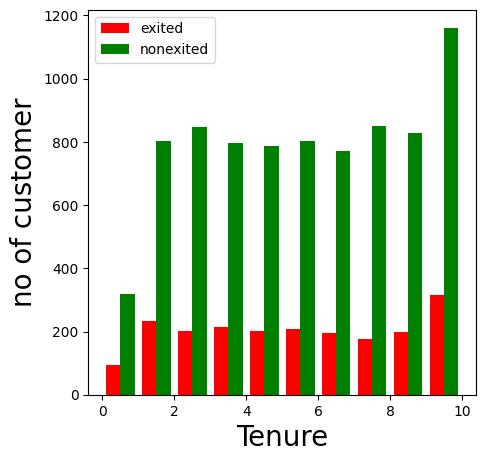

In [59]:
visualize(df_churn_exit,df_churn_notexit,"Tenure")

In [60]:
df_churn_exit2=df[df['Exited']==1]["Age"]
df_churn_notexit2=df[df['Exited']==0]["Age"]

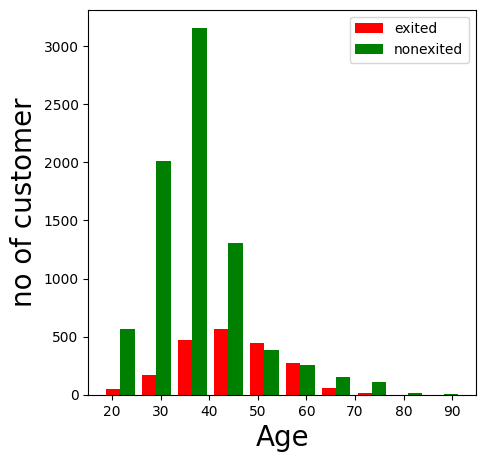

In [61]:
visualize(df_churn_exit2,df_churn_notexit2,"Age")

In [62]:
states=pd.get_dummies(df['Geography'],dtype=float)

In [63]:
gender=pd.get_dummies(df['Gender'],dtype=float)

In [64]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df=pd.concat([df,states,gender],axis=1)

In [66]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [67]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain','Female','Male']]

In [68]:
y=df['Exited']

In [69]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc=StandardScaler()

In [73]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [74]:
x_train

array([[ 2.00023635e+00,  1.63476627e+00,  8.39158139e-04, ...,
         1.74400987e+00, -9.13708042e-01,  9.13708042e-01],
       [ 7.00267547e-01, -6.55662503e-01,  1.03744627e+00, ...,
         1.74400987e+00, -9.13708042e-01,  9.13708042e-01],
       [-1.06397582e+00, -6.55662503e-01, -1.03576795e+00, ...,
        -5.73391249e-01,  1.09444150e+00, -1.09444150e+00],
       ...,
       [-1.43539548e+00,  8.71290011e-01,  3.46374862e-01, ...,
        -5.73391249e-01, -9.13708042e-01,  9.13708042e-01],
       [-4.44943063e-01, -6.55662503e-01,  3.46374862e-01, ...,
        -5.73391249e-01,  1.09444150e+00, -1.09444150e+00],
       [ 4.93923293e-01,  1.07813754e-01,  6.91910566e-01, ...,
        -5.73391249e-01,  1.09444150e+00, -1.09444150e+00]])

In [75]:
x_test

array([[ 0.2566274 , -0.27392437,  0.69191057, ..., -0.57339125,
        -0.91370804,  0.91370804],
       [ 0.92724623,  1.15759361, -0.34469655, ..., -0.57339125,
         1.0944415 , -1.0944415 ],
       [-0.59970125, -0.75109703, -1.03576795, ..., -0.57339125,
         1.0944415 , -1.0944415 ],
       ...,
       [-0.2282816 ,  1.53933174,  0.69191057, ...,  1.74400987,
         1.0944415 , -1.0944415 ],
       [ 0.40106838,  2.68454612,  1.38298197, ..., -0.57339125,
        -0.91370804,  0.91370804],
       [ 1.00978393,  0.96672454,  0.69191057, ..., -0.57339125,
         1.0944415 , -1.0944415 ]])

In [76]:
import keras

In [77]:
from keras.models import Sequential
from keras.layers import Dense

In [78]:
classifier=Sequential()

In [79]:
classifier.add(Dense(activation="relu",input_dim=13,units=6,kernel_initializer="uniform"))

C:\Users\LENOVO.LAPTOP-K3FTEK88\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
classifier.add(Dense(activation="relu",units=6,kernel_initializer="uniform"))

In [81]:
classifier.add(Dense(activation="sigmoid",units=1,kernel_initializer="uniform"))

In [82]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [83]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
classifier.fit(x_train,y_train,batch_size=10,epochs=50)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7887 - loss: 0.5755
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7991 - loss: 0.4228
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7942 - loss: 0.4269
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8255 - loss: 0.4131
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8318 - loss: 0.4181
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8411 - loss: 0.3988
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8321 - loss: 0.4060
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8353 - loss: 0.4057
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8439 - loss: 0.3874
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8346 - loss: 0.4020
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8369 - loss: 0.4004
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [85]:
y_pred=classifier.predict(x_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [86]:
y_pred=(y_pred>0.5)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [94]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2297   88]
 [ 417  198]]


In [95]:
accuracy=accuracy_score(y_test,y_pred)

In [96]:
print("accuracy",accuracy)

accuracy 0.8316666666666667


In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2385
           1       0.69      0.32      0.44       615

    accuracy                           0.83      3000
   macro avg       0.77      0.64      0.67      3000
weighted avg       0.81      0.83      0.81      3000

